# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

# Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project Goals

This project centers on applying machine learning techniques, learned through Codecademy, to analyze a dataset. Its primary focus is to explore whether OkCupid's users' astrological signs can be predicted using other profile variables. Understanding this is vital as many users value astrological signs in finding suitable matches. Moreover, predicting signs for users who haven't provided this information could significantly improve OkCupid's matchmaking experience.


### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This approach will employ descriptive statistics and data visualization to uncover crucial insights into the distribution, count, and interrelation of variables. Given that the project aims to predict users' astrological signs, it will implement classification algorithms from the supervised learning category within machine learning models.

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


# Import Python Modules

First import the modules being used for this project:

In [90]:
# import necessary machine learning algorithms 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# load the dataset
To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.

In [91]:
# import data
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying 

## The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:** What I'm doing with my life
- **essay2:** I'm really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if...


In [92]:
# diplay columns
print(profiles.columns)

#display shape of data
print(profiles.shape)

#display the data info
print(profiles.info())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  objec

Identify missing data, outliers, and duplicates: Use the `isnull function` to identify missing values in the dataset. Use the `value_counts` function to identify duplicates in the dataset. Use `box plots and histograms` to identify outliers in the dataset.**

### See Duplicates in data 

In [93]:
# print number duplicates in data
duplicates = profiles.duplicated()
print("__________________________")
print(duplicates.value_counts())

# print decribe data
print("__________________________")
print(profiles.describe(include='all'))

__________________________
False    59946
dtype: int64
__________________________
                 age body_type             diet    drinks  drugs  \
count   59946.000000     54650            35551     56961  45866   
unique           NaN        12               18         6      3   
top              NaN   average  mostly anything  socially  never   
freq             NaN     14652            16585     41780  37724   
mean       32.340290       NaN              NaN       NaN    NaN   
std         9.452779       NaN              NaN       NaN    NaN   
min        18.000000       NaN              NaN       NaN    NaN   
25%        26.000000       NaN              NaN       NaN    NaN   
50%        30.000000       NaN              NaN       NaN    NaN   
75%        37.000000       NaN              NaN       NaN    NaN   
max       110.000000       NaN              NaN       NaN    NaN   

                                education essay0        essay1     essay2  \
count                   

## Age

In [94]:
# Calculate the IQR
q1 = profiles.age.quantile(0.25)
q3 = profiles.age.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

profiles_age = profiles[(profiles.age >= lower_fence) & (profiles.age <= upper_fence)].reset_index(drop=True)

count    57308.000000
mean        31.093774
std          7.571302
min         18.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         53.000000
Name: age, dtype: float64
[110, 109, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18]


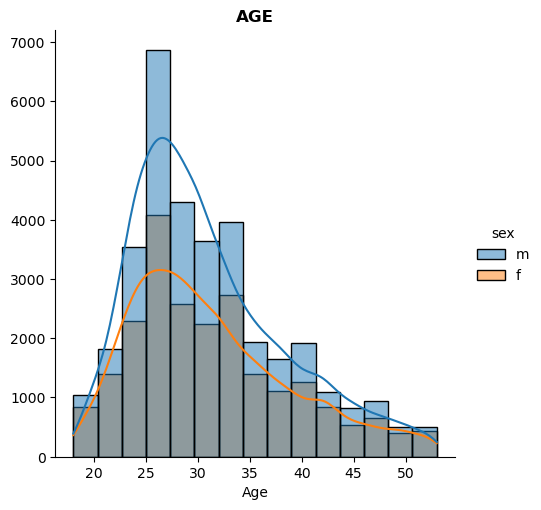

In [95]:
# describe the column
print(profiles_age.age.describe())

# print unique age
print(sorted(profiles.age.unique(), reverse=True))

# hist plot
sns.displot(x='age', data=profiles_age, bins=15, kde=True, hue='sex')
plt.title("AGE", fontweight='bold')
plt.xlabel("Age")
plt.ylabel("")
plt.savefig("age.png", dpi=1000)
plt.show()

The age column in the dataset has an average age of 31.09 years and a standard deviation of 7.57 years. The minimum age in the dataset is 18 years, and the maximum age is 69 years. The ages in the dataset range from 18 to 69 years, with most people falling in the age range of 25 to 35 years.

## Height

In [96]:
# Calculate the IQR
q1 = profiles.height.quantile(0.25)
q3 = profiles.height.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

profiles_height = profiles[(profiles.height >= lower_fence) & (profiles.height <= upper_fence)].reset_index(drop=True)

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64
57.0
82.0


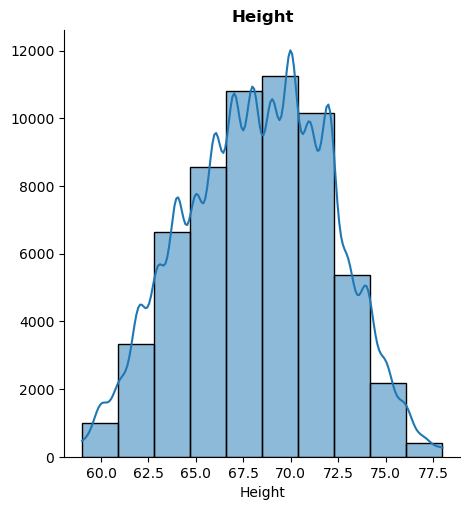

In [97]:
# describe height columns
print(profiles.height.describe())

# cut more impossible value
print(profiles.height.quantile(0.001))
print(profiles.height.quantile(0.999))

# hist plot column
sns.displot(x='height', data=profiles_height, kde=True, bins=10)
plt.title('Height', fontweight='bold')
plt.xlabel('Height')
plt.ylabel('')
plt.show()

The data shows that the mean height of the individuals is 68.30 inches with a standard deviation of 3.79 inches. The minimum height in the data is 57 inches while the maximum is 95 inches. The 25th percentile height is 66 inches, the 50th percentile height is 68 inches, and the 75th percentile height is 71 inches.

## Income 

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64


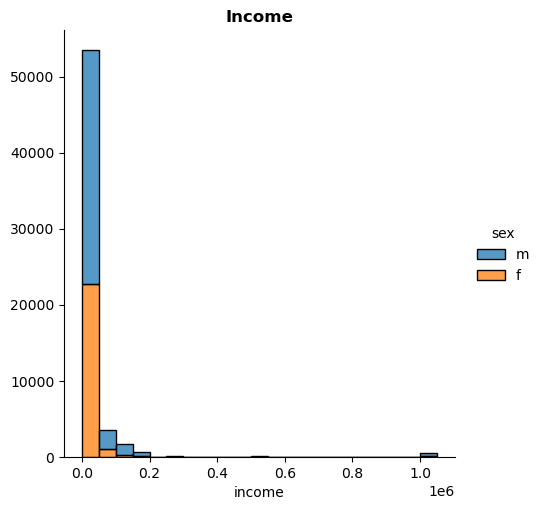

In [98]:
# describe income column
print(profiles.income.describe())

# hist plot column
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")
plt.title('Income', fontweight='bold')
plt.xlabel('income')
plt.ylabel("")
plt.show()

Here is the data of income, it seems that the majority of the participants do not include their income figures.

## Sex 

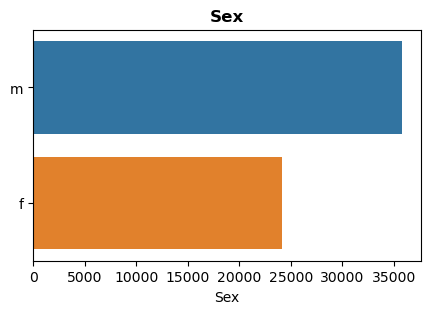

In [99]:
# bar plot
plt.figure(figsize=(5,3))
sns.countplot(data=profiles, y="sex")
plt.title("Sex", fontweight='bold')
plt.ylabel("")
plt.xlabel("Sex")
plt.savefig("sex.png", dpi=1000)
plt.show();

There are 35829 male users and 24117 female users in the dataset.

## Body type 

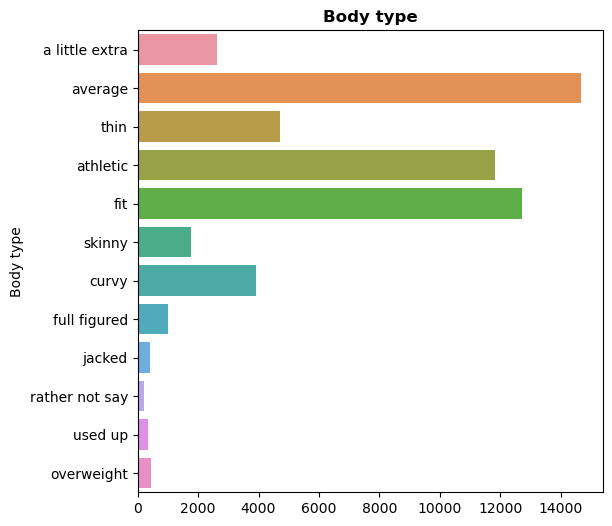

In [100]:
# bar plot
sns.countplot(y=profiles['body_type'])
plt.title("Body type", fontweight='bold')
plt.ylabel("Body type")
plt.xlabel("")
plt.show()

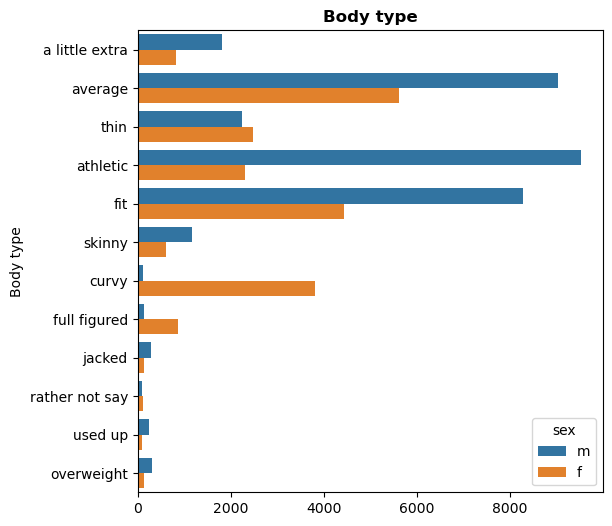

In [101]:
# bar plot
sns.countplot(data=profiles, y="body_type", hue = "sex")
plt.title("Body type", fontweight='bold')
plt.ylabel("Body type")
plt.xlabel("")
plt.show();

The prevailing body type among users tends to be "average," with notable mentions for "athletic" and "fit" following closely. Conversely, categories such as "used up," "overweight," and "jacked" exhibit the lowest frequency among users.

## Diet 

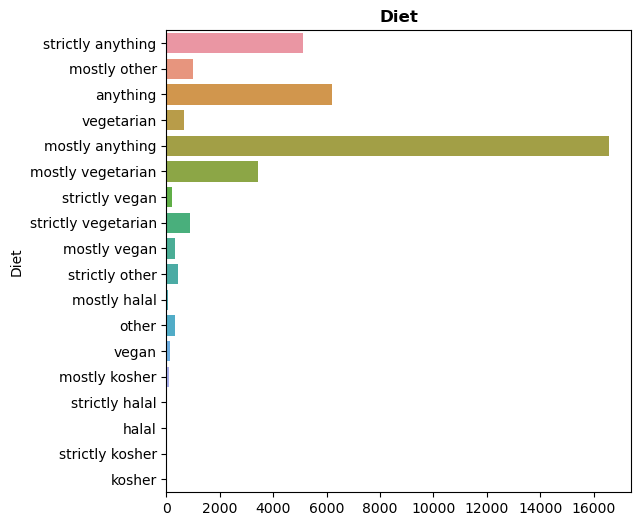

In [102]:
# bar plot
sns.countplot(data=profiles, y="diet")
plt.title("Diet", fontweight='bold')
plt.ylabel("Diet")
plt.xlabel("")
plt.show();

The diet information provided in the dataset reveals that the majority of users identify as eating "mostly anything". Other common responses include "anything" and "strictly anything". It's worth noting that a significant portion of users didn't provide information about their diet. Among those who did, the least common categories were "kosher", "vegan", and "halal".

## Drinks 

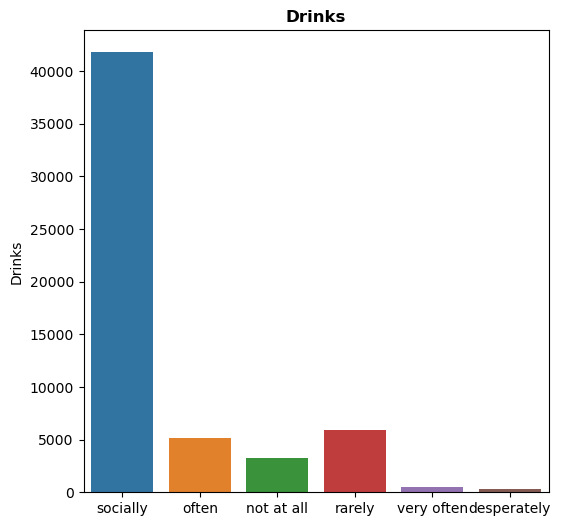

In [103]:
# bar plot
sns.countplot(x="drinks", data=profiles)
plt.title("Drinks", fontweight='bold')
plt.ylabel("Drinks")
plt.xlabel("")
plt.show();

The drinks information in the dataset reveals that most users describe their drinking habits as 'socially'. This is followed by 'rarely' and 'often', while 'not at all' is also a fairly common response. Overall, the data suggests that a significant portion of users on the platform consume alcohol occasionally or socially.

## Drugs

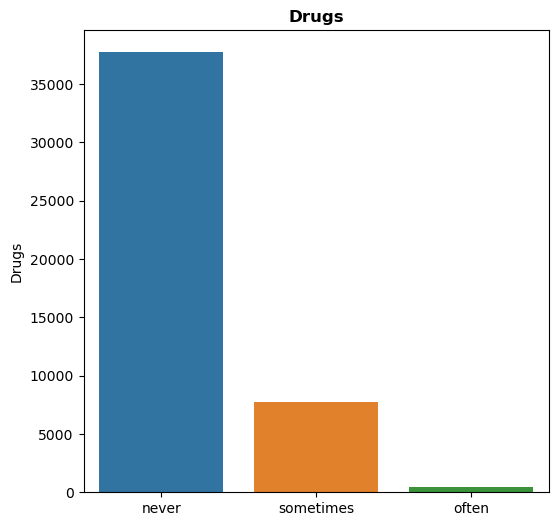

In [104]:
# bar plot
sns.countplot(x='drugs', data=profiles)
plt.title("Drugs", fontweight='bold')
plt.ylabel("Drugs")
plt.xlabel("")
plt.show();

The majority of users (over 75%) stated that they never use drugs, while only a small fraction (less than 1%) claimed to use drugs often. Some users (around 15%) reported using drugs sometimes.

## Education

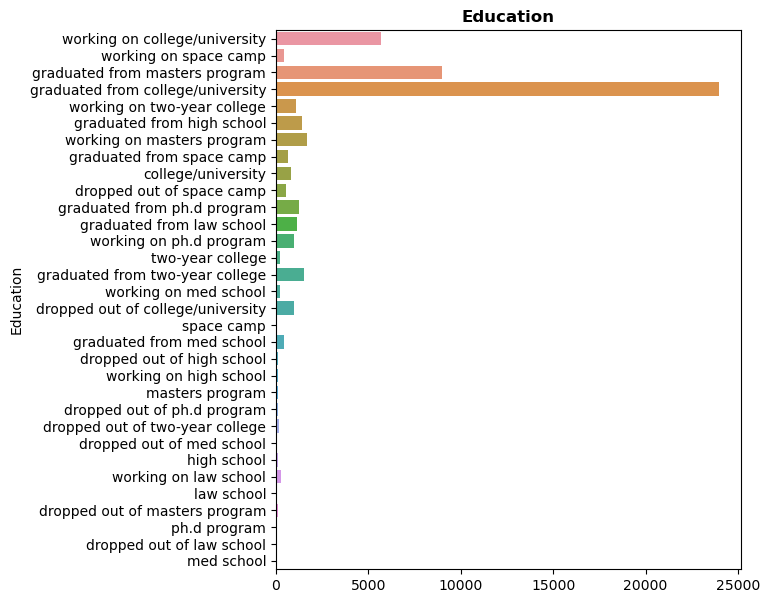

In [105]:
# bar plot
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="education")
plt.title("Education", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("")
plt.show();

Overall, the data suggests that many users have pursued higher education, with college and university degrees being the most common. However, there is also a significant portion of the user population who are currently in school or have not completed their education.

## Job

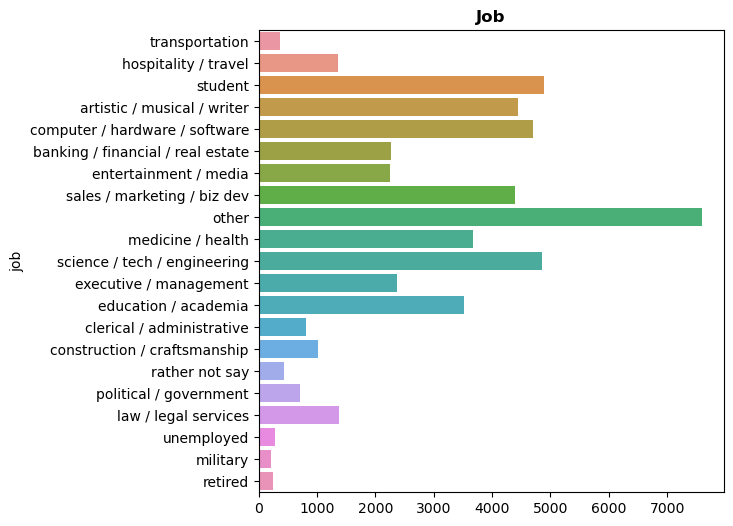

In [106]:
# bar plot
sns.countplot(data=profiles, y="job")
plt.title("Job", fontweight='bold')
plt.ylabel("job")
plt.xlabel("")
plt.show();

The most common job listed is "other," which could encompass a variety of fields not listed in the categories. Following "other," the most frequent job categories listed are "student," "science/tech/engineering," "computer/hardware/software," "sales/marketing/biz dev," "artistic/musical/writer," and "medicine/health." There are also job categories with much smaller representation, such as "retired," "military," and "transportation." It is worth noting that some users have left the job field blank or chose to select "rather not say."

## Offspring 

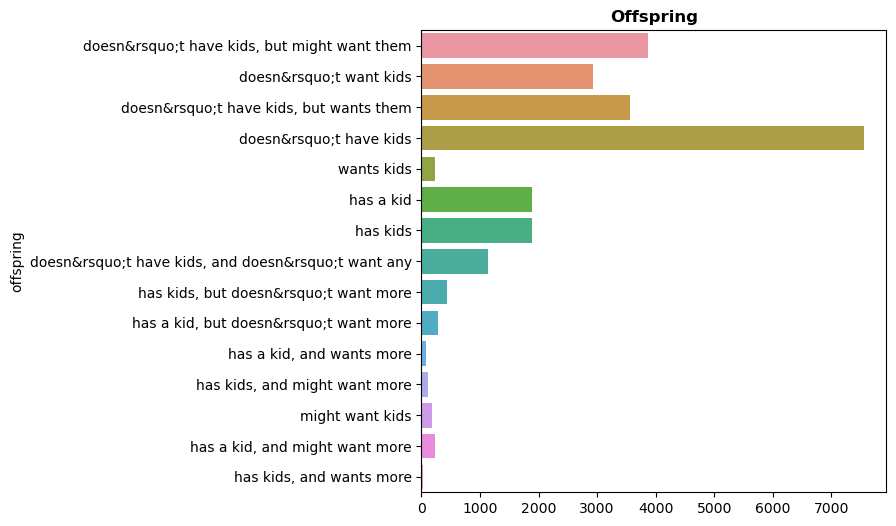

In [107]:
# bar plot
sns.countplot(data=profiles, y="offspring")
plt.title("Offspring", fontweight='bold')
plt.ylabel("offspring")
plt.xlabel("")
plt.show();

The majority of users don't have kids, and a significant number of them don't want kids. However, there are also many who don't have kids but might want them or want them in the future. Additionally, there are users who already have kids or a kid, and some of them might want more. 

## Orientation 

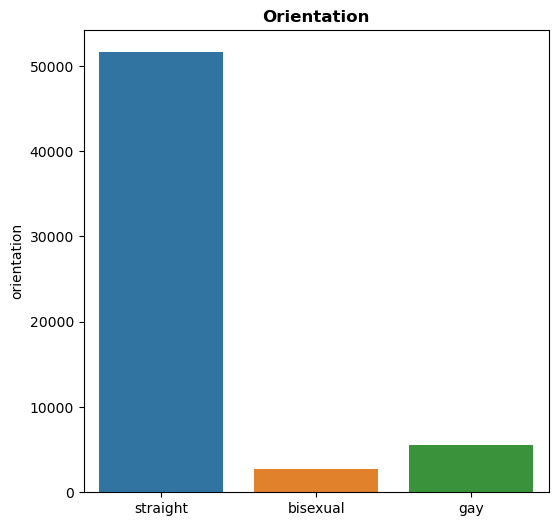

In [108]:
# bar plot
sns.countplot(x="orientation", data=profiles)
plt.title("Orientation", fontweight='bold')
plt.ylabel("orientation")
plt.xlabel("")
plt.show();

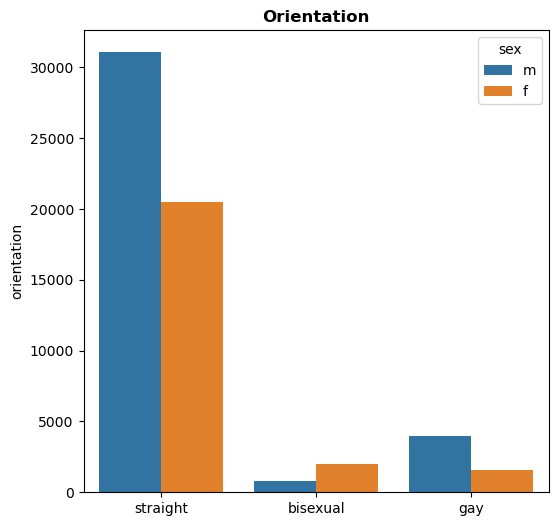

In [109]:
# bar plot
sns.countplot(x="orientation", data=profiles, hue = "sex")
plt.title("Orientation", fontweight='bold')
plt.ylabel("orientation")
plt.xlabel("")
plt.show();

The majority of platform users identify as straight, with over 30,000 males and more than 20,000 females expressing this orientation. Interestingly, there's a visible proportion of users identifying as gay, surpassing the count of those identifying as bisexual. Around 5,500 users identify as gay, whereas approximately 2,700 users identify as bisexual.

## Pets 

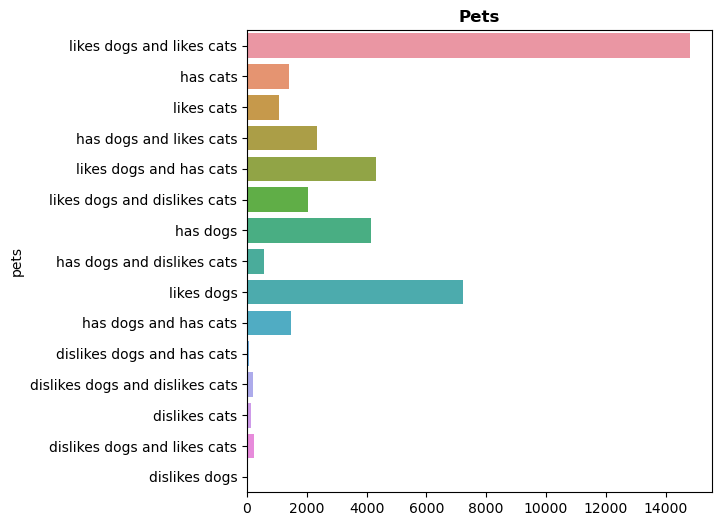

In [110]:
#bar plot
sns.countplot(data=profiles, y="pets")
plt.title("Pets", fontweight='bold')
plt.ylabel("pets")
plt.xlabel("")
plt.show();

The majority of users like or have dogs, and a large number also like or have cats. Particularly, the most frequent pet-related response entails "liking both dogs and cats," followed by preferences for "liking dogs only" and "liking dogs and owning cats.

## Religion 

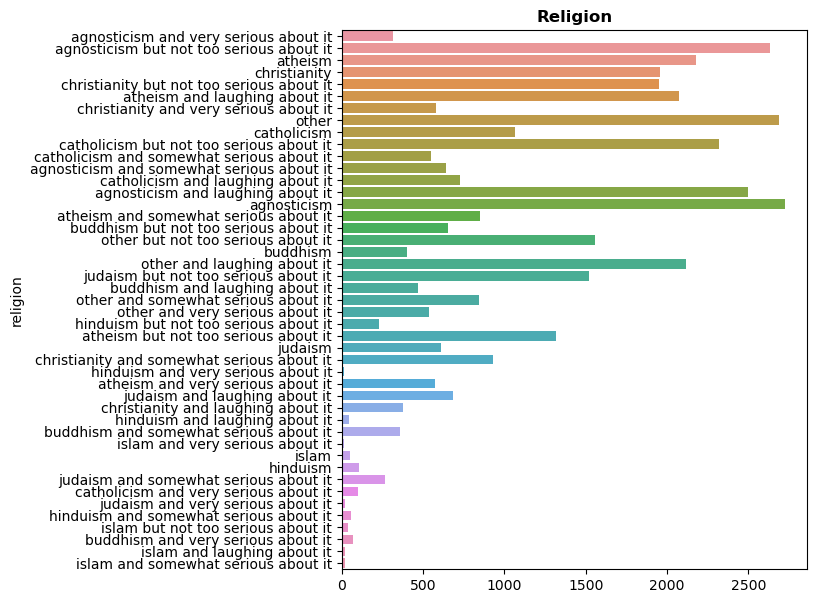

In [111]:
# set figure size
plt.figure(figsize=(6,7))

# bar plot
sns.countplot(data=profiles, y="religion")
plt.title("Religion", fontweight='bold')
plt.ylabel("religion")
plt.xlabel("")
plt.show();

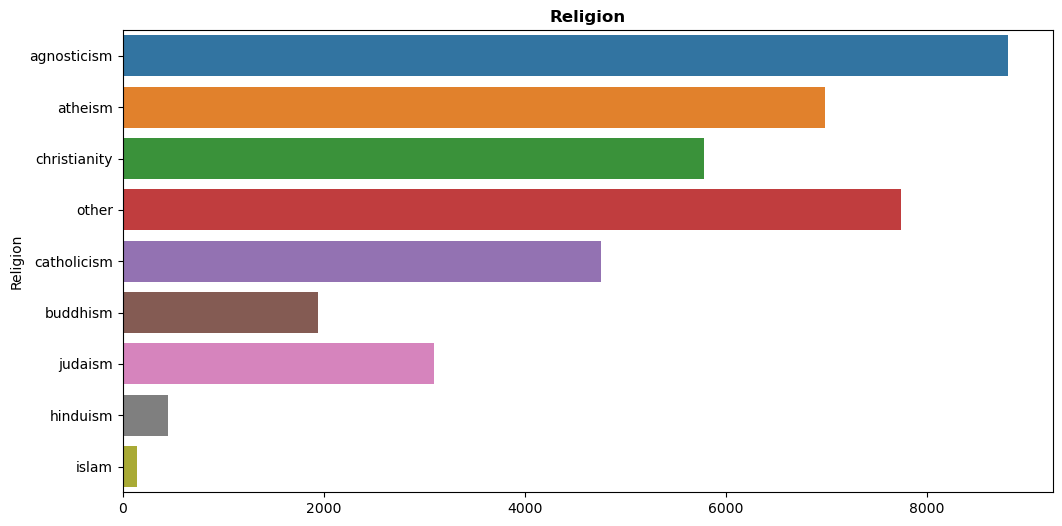

In [112]:
# clean data
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)

# bar plot
ax = plt.figure(figsize=(12, 6))
sns.countplot(y='religionCleaned', data=profiles)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
ax.savefig("religion.png", dpi=1000)
plt.show();

It appears that a substantial portion of users identifies as Agnostic, Other, or Atheist, with Agnosticism being the predominant choice. Following these, Christianity and Catholicism emerge as the most prevalent religious affiliations, while Judaism and Buddhism also boast a considerable number of followers. Comparatively, Hinduism and Islam exhibit a relatively smaller presence among users on the platform.

## Smokes 

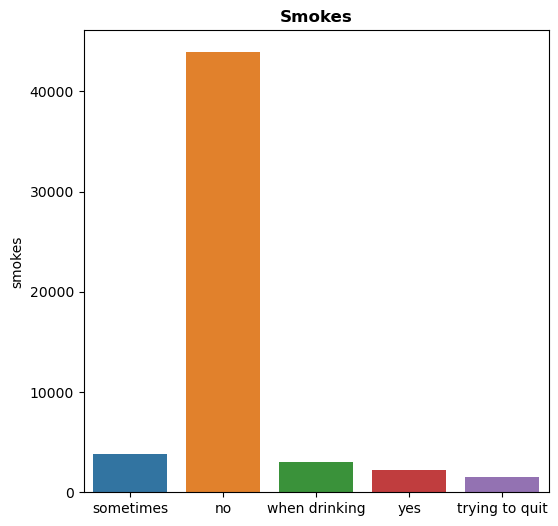

In [113]:
# bar plot
sns.countplot(x="smokes", data=profiles)
plt.title("Smokes", fontweight='bold')
plt.ylabel("smokes")
plt.xlabel("")
plt.show();

Around 44,000 users stated they do not smoke, while only 2,231 users specified regular smoking habits. Additionally, 1,480 users mentioned attempting to quit smoking.

## Status 

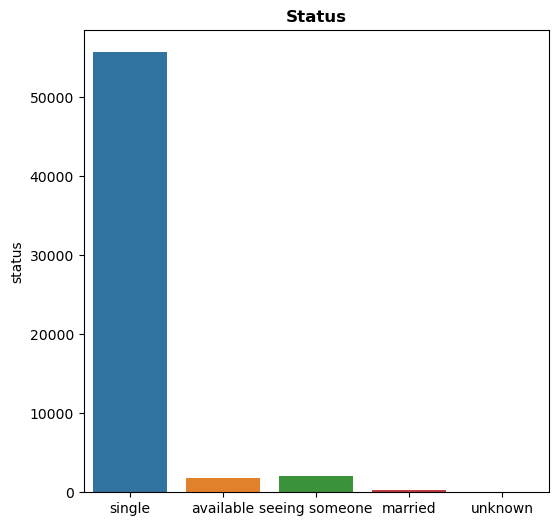

In [114]:
# bar plot
sns.countplot(x="status", data=profiles)
plt.title("Status", fontweight='bold')
plt.ylabel("status")
plt.xlabel("")
plt.show();

The majority of users are single. There are 2,064 users who are currently seeing someone, and 1,865 users who are available. A smaller number of users are married.

## Sign 

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


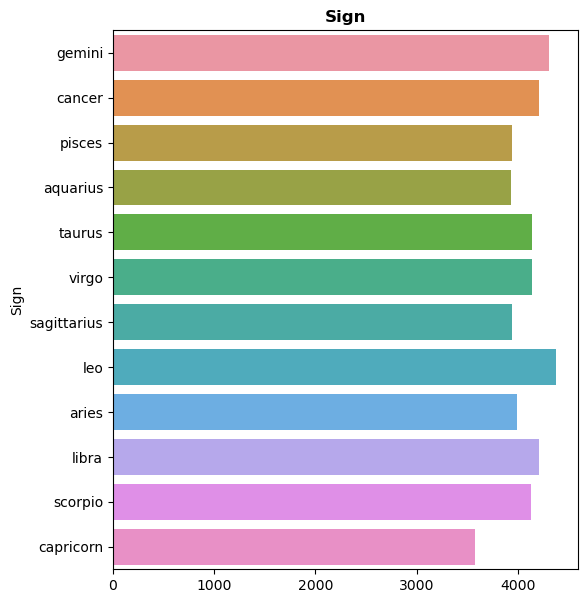

In [115]:
# clean data
profiles["signscleaned"] = profiles.sign.str.split().str.get(0)
print("number of categories:", profiles.signscleaned.nunique())
print("categories:", profiles.signscleaned.unique())

# bar plot
plt.figure(figsize=(6,7))
sns.countplot(y='signscleaned', data=profiles)
plt.title("Sign", fontweight='bold')
plt.xlabel("")
plt.ylabel("Sign")
plt.show()

Leo stands as the most prevalent zodiac sign among users, closely trailed by Gemini, Libra, and Cancer. Virgo, Taurus, and Scorpio also boast a considerable user count. Aries, Pisces, Sagittarius, and Aquarius exhibit a comparable user base, while Capricorn records the lowest number of users among the zodiac signs.

## Data Preperation  

### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [116]:
# clean null data
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
religionCleaned    20226
signscleaned       11056
dtype: int64

### Preprocessing 

Getting your data ready for modeling is an important step. It not only accelerates the process but also enhances the quality of your models. As the saying goes, "garbage in, garbage out," emphasizing the need for ensuring the quality of the data we feed into our models before sharing it with others.

The model will utilize a subset of variables chosen specifically for their potential to predict astrological signs. Variables were carefully selected based on their relevance, excluding those, like 'age,' that might not strongly correlate. To ensure a complete dataset, any missing values have been removed.

Here 'na' values are dropped to create a fully complete data set. 

In [117]:
# drop na variables
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signscleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

### Dummy variables 

Next, dummy variables are generated to handle categorical variables. This transformation assigns a unique binary identifier to each category within a variable. As a result, the dataset expands to encompass 81 columns, setting the stage for predicting astrological signs.

In [118]:
# create dummy variable
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [119]:
df.head()

,signscleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Label imbalance
It's crucial to assess the balance in prediction labels, especially in a multi-class problem with multiple potential outcomes. Imbalances in response variables are problematic, as they indicate that certain labels occur infrequently. This poses a challenge for machine learning algorithms, as insufficient data for training can lead to inaccurate predictions.

Upon examination of the provided dataset, we find that the counts for all zodiac signs are relatively uniform, showing no significant deviations. Consequently, there's no need to be concerned about imbalances, and addressing this issue is not necessary.

In [120]:
# clean labels
df.signscleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signscleaned, dtype: int64

### Splitting data

In [121]:
# Split the data into training and validation sets
# Divide the dataset into a training set (75%) and a validation set (25%) to evaluate the model.

col_length = len(df.columns)

x = df.iloc[:, 1:col_length]  # Features
y = df.iloc[:, 0:1]  # Target variable

# Split the data into chunks
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=0)

# Turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

### Prediction 

#### Model build

Model building is the process of training and evaluating a machine learning model using the preprocessed data. In this stage, various algorithms can be used to build the model, and its performance can be evaluated using metrics such as accuracy, precision, recall, and F1 score. The best-performing model can then be selected for deployment.

In [122]:
# Import necessary machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

#### Logistic Regression

The initial model employs logistic regression, utilizing the multi_class="multinomial" argument. Predictions are generated using the lr_model based on the training dataset, allowing for an evaluation of the model's performance.

In [123]:
# Build and evaluate a logistic regression model
lr_model = LogisticRegression(multi_class="multinomial").fit(x_train, y_train)
lr_predictions = lr_model.predict(x_train)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

#### K-Nearest Neighbors 

K-Nearest Neighbors (KNN) stands as a straightforward machine learning algorithm applicable for classification and regression. Operating as a non-parametric technique, it relies on distances between data points for predictions. Known for its "lazy learning" approach, KNN doesn't formulate a discriminative function from training data; rather, it memorizes the entire dataset. During predictions, it identifies the K closest neighbors to the query point and derives its prediction from their collective class or value.

In [125]:
# create K-Nearest Nieghbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_train)
print("KNN Classification Report:")
print(classification_report(y_train, knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



The `KNeighborsClassifier` model utilized 20 neighbors in its predictions for the signs, maintaining the default `n_neighbors` value of 5. This parameter can be adjusted later if necessary. Despite the lower accuracy of 33%, there are positive indications for this model.

#### Decision Tree

A decision tree is a supervised learning algorithm used for both classification and regression tasks in machine learning. It's a graphical representation of a series of decisions based on features in the dataset. Decision trees are versatile and widely used due to their simplicity, interpretability, and ability to handle both numerical and categorical data. However, to mitigate overfitting, techniques like pruning, limiting tree depth, or using ensemble methods are often employed.

In [126]:
# create Decision Tree
cart_model = DecisionTreeClassifier().fit(x_train, y_train)
cart_predictions = cart_model.predict(x_train)

print(classification_report(y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



The decision tree was set at default, `max_depth` is `none`, the tree expands until all leaves become pure or until each leaf contains fewer samples than specified by `min_samples_split`. The outcomes are notably encouraging, showcasing a 78% accuracy using this model.

#### Confusion Matrix 

[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

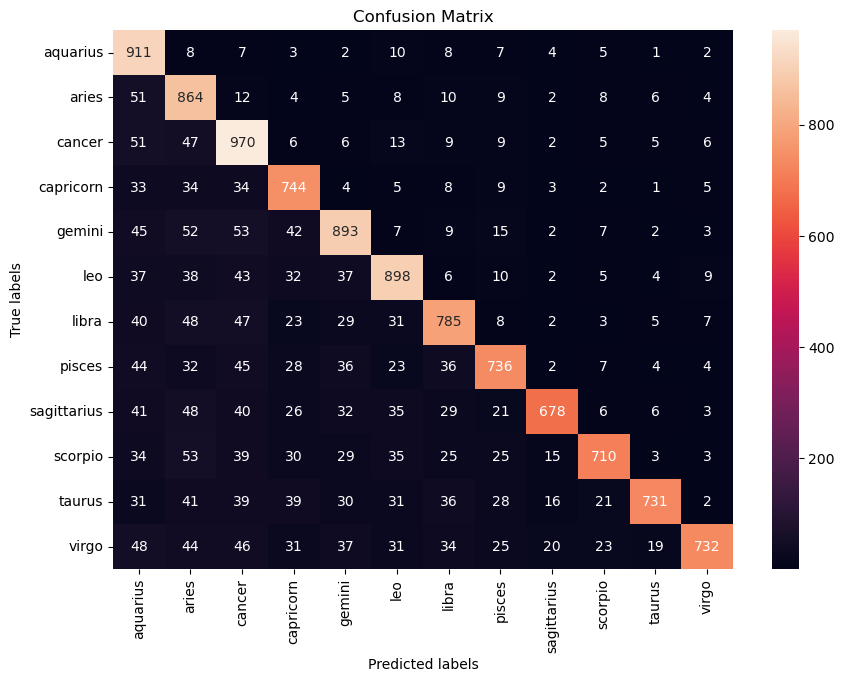

In [127]:
# plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cart_cm = confusion_matrix(y_train, cart_predictions)
cart_labels = cart_model.classes_

plt.figure(figsize=(10, 7))

ax = plt.subplot()
sns.heatmap(cart_cm, annot=True, ax=ax, fmt="d")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels)
ax.yaxis.set_ticklabels(cart_labels)


The presented confusion matrix showcases true values on the y-axis and predicted values on the x-axis. The brighter diagonal elements indicate higher counts, emphasizing the prevalence of True Positives and suggesting a stronger accuracy due to correct predictions.

In [128]:
# depth of Tree 
cart_model.get_depth()

49

Upon revisiting the model, a rapid analysis reveals that this tree model boasts a depth of 49 branches. Such depth likely leads to poor generalization to new datasets, indicative of overfitting specifically tailored to this dataset.

#### K-Fold Validation Updated

In [129]:
# Import necessary modules for K-Fold 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, x_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08144246 0.09319287 0.0952188  0.09846029 0.08633968]
Baseline: 9.09% (0.62%)


To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

#### Decision Tree Updated

The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point.

In [130]:
#change max_depth of decision tree
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(x_train, y_train) 
cart_predictions20 = cart_model20.predict(x_train) 

print(classification_report(y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.43      1129
   capricorn       0.52      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.62      0.34      0.44       997
 sagittarius       0.64      0.33      0.43       965
     scorpio       0.37      0.39      0.38      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model.  

In [131]:
results20 = cross_val_score(cart_model20, x_train, y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07779579 0.08589951 0.08549433 0.08427877 0.09079854]
Baseline: 8.49% (0.62%)


The updated model continues to hover around an average of approximately 8%, indicating its performance remains subpar and not up to a satisfactory standard.

### Final Model

In [132]:
knn_predictionsVal = knn_model.predict(x_val) 
print(classification_report(y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



It appears that the knn_model might offer the most viable option for OkCupid when users don't provide their sign information in their profiles. Despite utilizing the holdout or validation set, achieving only around 8% accuracy is rather inadequate.

#### Confusion Matrix Updated

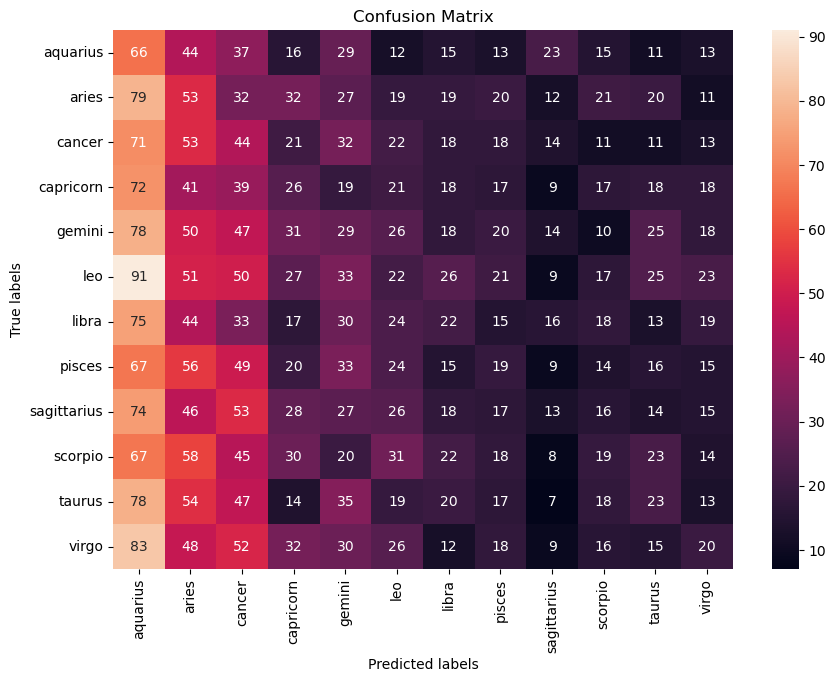

In [133]:
final_cm = confusion_matrix(y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90) 

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

Analyzing the confusion matrix reveals that predictions predominantly leaned towards Cancer, Gemini, Leo, and Virgo. However, accuracy was not high, as depicted by the vertical color band, indicating evenly distributed guesses, where a significant portion turned out to be incorrect with only a few being accurate.

## Conclusion

In this project, I jumped into the analysis of a dataset obtained from OKCupid, a dating app employing multiple-choice and short-answer formats for user matching. The initial steps involved data cleaning and exploration, followed by a series of visualizations and statistical analyses aimed at addressing our research questions.

During this exploration, ther were several intriguing insights about the dataset and the app's user demographic emerged. Notably, users fell within the age range of 25 to 35, with a higher representation of men than women. Additionally, users tended to possess higher education levels and varied religious affiliations.

Subsequently, we embarked on predicting users' astrological signs using their OKCupid profiles. The objective was to overcome the challenge of missing astrological signs by employing Logistic Regression and K-Nearest Neighbors algorithms. However, both models yielded a relatively low accuracy in predicting users' astrological signs based on their profiles. This suggests that, unfortunately, the final model's accuracy did not significantly surpass random guessing. Predicting astrological signs based solely on user profiles proves to be a challenging task.

### Next Steps

Moving forward, potential next steps might encompass exploring alternative models, fine-tuning hyperparameters, and evaluating whether supplementing data or integrating new features could enhance the accuracy of predictions. This project underscores the challenge associated with predicting astrological signs, hinting at the possibility that other variables could exert a more substantial influence on successful matchmaking within the OKCupid platform.